In [ ]:
'''In this NoteBook we will try to visualize the Uber Company's Dataset for Trips using DataViz tools like Matplotlib & Seaborn for
effective and intercative Ploting'''

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('UberDataset.csv')

In [ ]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.tail(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<ipython-input-29-b3b141155c30>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




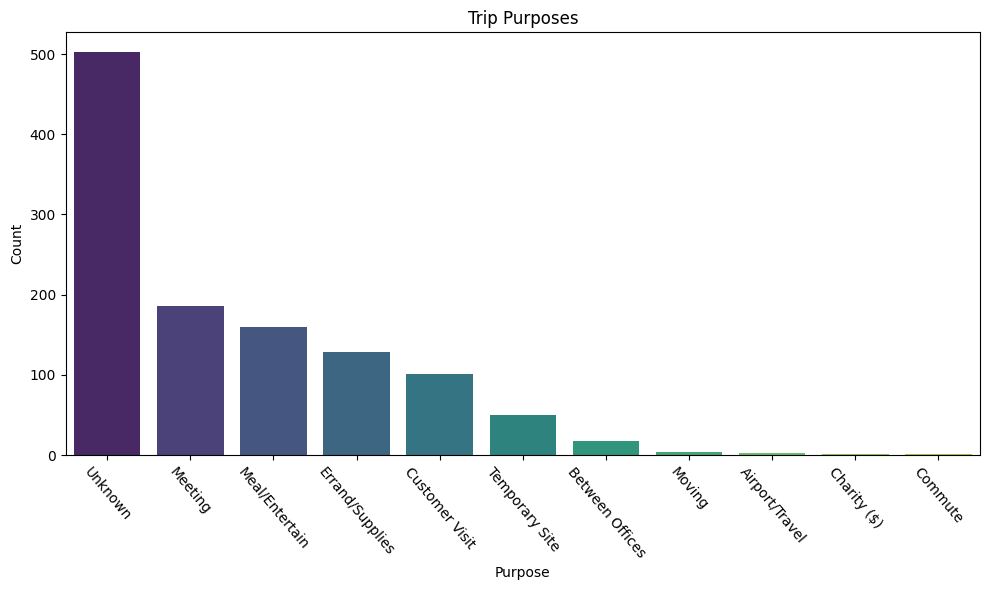

In [29]:
#Exploratory Data Analysis
# Visualize trip purposes
purpose_counts = df['PURPOSE'].value_counts()

# Create bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="viridis")

# Customize labels and title
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Trip Purposes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=-50)

# Display the plot
plt.tight_layout()
plt.show()


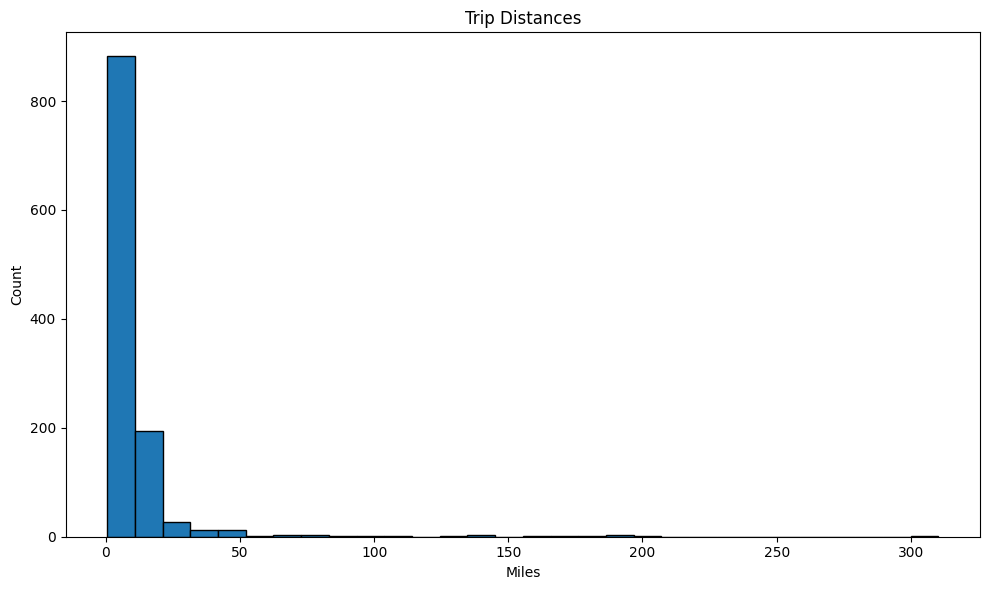

In [30]:
# Visualize trip distances
plt.figure(figsize=(10, 6))
plt.hist(df['MILES'], bins=30, edgecolor='black')

# Customize labels and title
plt.xlabel('Miles')
plt.ylabel('Count')
plt.title('Trip Distances')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Feature Engineering
from dateutil.parser import parse
df['START_DATE'] = df['START_DATE'].apply(lambda x: parse(x))
df['start_day'] = df['START_DATE'].dt.strftime('%A')

In [ ]:
df['start_day']

0          Friday
1        Saturday
2        Saturday
3         Tuesday
4       Wednesday
          ...    
1150     Saturday
1151     Saturday
1152     Saturday
1153     Saturday
1154     Saturday
Name: start_day, Length: 1154, dtype: object

KeyError: 7

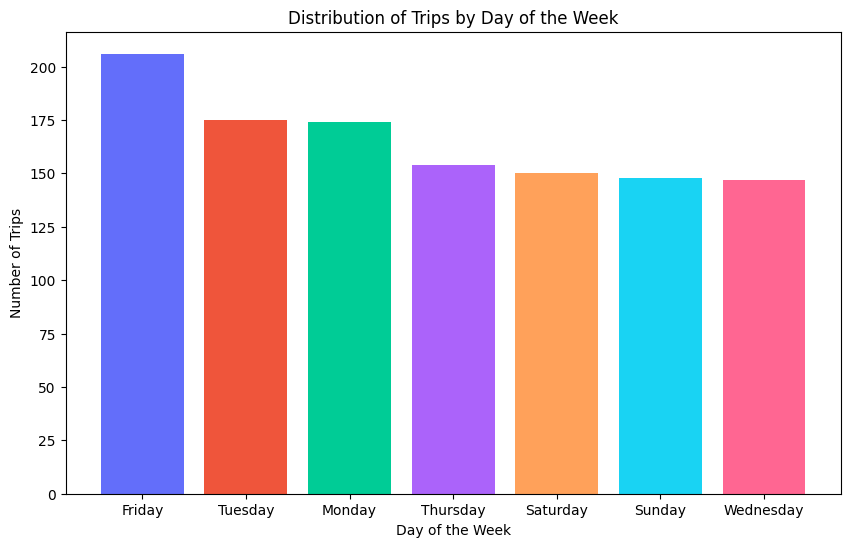

In [31]:
# plottin the number of trips per each day
day_counts = df['start_day'].value_counts().reset_index()
day_counts.columns = ['Day_of_Week', 'Count']

# Define colors similar to Plotly's qualitative colors
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

# Create bar plot using matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(day_counts['Day_of_Week'], day_counts['Count'], color=colors)

# Customize labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Day of the Week')

# Adding colors to legend
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=colors[i], label=day_counts['Day_of_Week'][i]) for i in range(len(colors))]
plt.legend(handles=legend_handles, title='Day of the Week')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
avg_distance_by_purpose = df.groupby('PURPOSE')['MILES'].mean().reset_index()
avg_distance_by_purpose.columns = ['Purpose', 'Average Miles']

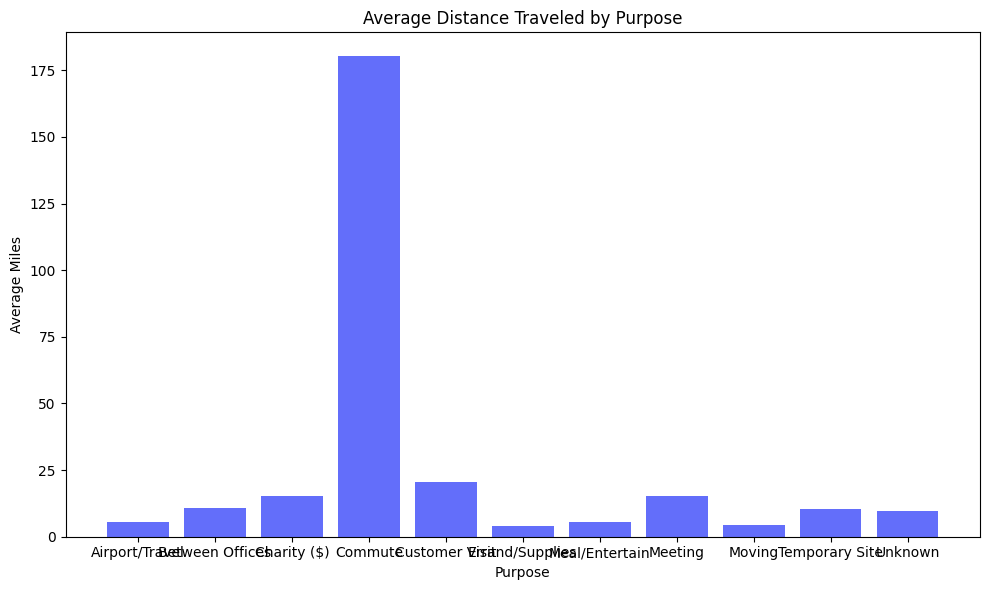

In [32]:
# Create a bar chart using Plotly
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_distance_by_purpose['Purpose'], avg_distance_by_purpose['Average Miles'], color='#636EFA')

# Customize labels and title
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Distance Traveled by Purpose')

# Display the plot
plt.tight_layout()
plt.show()